In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import geopandas as gp
import shapely
#import 

In [4]:
df = pd.read_csv('TX_cleaned.csv')

/Users/tedu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,16,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,lat,lon,officer_id,driver_race_original
0,TX-2006-0000001,TX,2006-01-01,00:00,Walker,Walker County,48471.0,674,NaN,F,...,False,NaN,NaN,False,Warning,NaN,NaN,NaN,09592,White
1,TX-2006-0000002,TX,2006-01-01,00:00,Hansford,Hansford County,48195.0,50,NaN,M,...,False,NaN,NaN,False,Citation,NaN,NaN,NaN,05457,White
2,TX-2006-0000003,TX,2006-01-01,00:00,Montgomery,Montgomery County,48339.0,700,NaN,M,...,True,Probable Cause,Probable Cause,True,Citation,NaN,NaN,NaN,11193,Hispanic
3,TX-2006-0000004,TX,2006-01-01,00:00,Chambers,Chambers County,48071.0,819,NaN,M,...,False,NaN,NaN,False,Warning,NaN,NaN,NaN,11758,White
4,TX-2006-0000005,TX,2006-01-01,00:00,Montgomery,Montgomery County,48339.0,456,NaN,M,...,True,Probable Cause,Probable Cause,True,Citation,NaN,NaN,NaN,11560,White


In [6]:
df_ = df[df['lat'].notnull() & df['lon'].notnull()]

In [9]:
df_harris = df_[df_.county_name == 'Harris County']

In [10]:
df_harris.shape

(351070, 26)

In [ ]:
df.shape

In [ ]:
df_.shape

In [ ]:
14485864 / 23397249 

In [ ]:
df_.head()

In [ ]:
df_.groupby('fine_grained_location').count().head()

In [ ]:
df_fgl = df_.groupby('fine_grained_location').count()

In [ ]:
df_fgl.shape

In [ ]:
df_sample_fgl = df_[df_.fine_grained_location == 2.0]

In [13]:
df_sample_harris = df_harris.iloc[:5000, : ]

In [14]:
print(df_sample_harris.shape)
df_sample_harris.head()

(5000, 26)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,lat,lon,officer_id,driver_race_original
3999991,TX-2007-1306098,TX,2007-07-18,09:11,Harris,Harris County,48201.0,766,NaN,F,...,False,NaN,NaN,False,Warning,NaN,29.777582,-95.372184,08738,Black
4031909,TX-2007-1338016,TX,2007-07-23,12:45,Harris,Harris County,48201.0,744,NaN,M,...,False,NaN,NaN,False,Warning,NaN,29.784717,-95.770248,08738,White
4031961,TX-2007-1338068,TX,2007-07-23,13:00,Harris,Harris County,48201.0,745,NaN,M,...,False,NaN,NaN,False,Citation,NaN,29.785049,-95.698532,08738,White
4041081,TX-2007-1347188,TX,2007-07-25,08:04,Harris,Harris County,48201.0,743,NaN,F,...,False,NaN,NaN,False,Citation,NaN,29.785083,-95.776565,08738,Hispanic
4077551,TX-2007-1383658,TX,2007-07-31,08:50,Harris,Harris County,48201.0,700,NaN,M,...,False,NaN,NaN,False,Warning,NaN,29.777433,-95.776367,08738,White


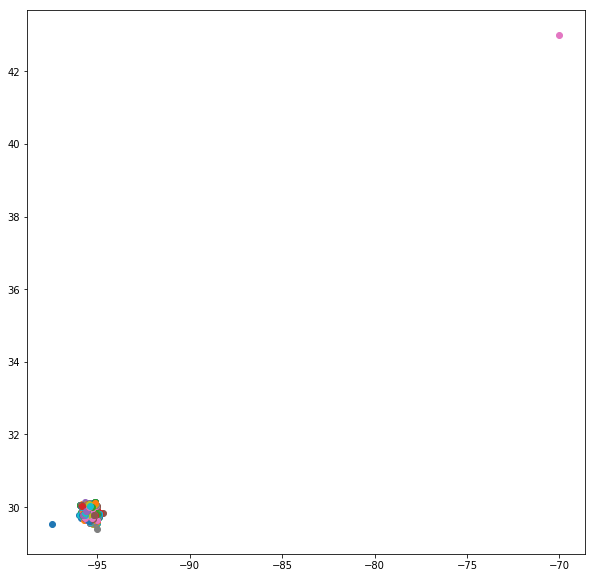

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(df_sample_harris.shape[0]):
    ax.plot(df_sample_harris.lon.iloc[i], df_sample_harris.lat.iloc[i], 'o')

In [ ]:
ls

In [19]:
shp = 'political-bnd_tx/txdot-counties/txdot-2015-county-generalized_tx.shp'
gdf_counties = gp.GeoDataFrame.from_file(shp)

In [ ]:
gdf_counties.head()

In [ ]:
print(gdf_counties.crs)

In [ ]:
gdf_counties.shape

In [ ]:
gdf_counties.plot()

In [17]:
df_sample_harris['lonlat'] = list(zip(df_sample_harris.lon, df_sample_harris.lat))
df_sample_harris['geometry'] = df_sample_harris.lonlat.apply(lambda x:shapely.geometry.Point(x))
#df_sample_fgl.rename(columns={df.columns[2] : 'pm2_5'})
#df.drop('lonlat', axis=1, inplace=True)

/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
df_sample_fgl.head()

In [18]:
crs_4269 = {'init': 'epsg:4269'}

gdf_sample = gp.GeoDataFrame(df_sample_harris, geometry='geometry', crs=crs_4269)

In [ ]:
print(gdf_sample.crs)

(29, 31)

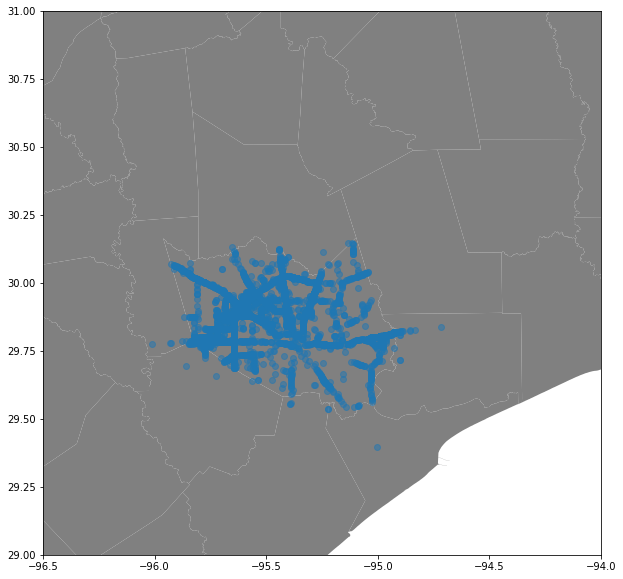

In [27]:
fig = plt.figure(figsize(10, 10))
ax_base = fig.add_subplot(111)

base = gdf_counties['geometry'].plot(ax=ax_base, color='gray')
gdf_sample['geometry'].plot(ax=base, marker='o', alpha=0.5)

ax_base.set_xlim(-96.5, -94)
ax_base.set_ylim(29, 31)